In [12]:
import edge_pydb.util as edgeutil
import numpy as np
from astropy.io import fits, ascii
import os, fnmatch
from edge_pydb import EdgeTable
import edge_pydb 
from edge_pydb import conversion, fitsextract, plotting, util
from collections import Counter
import re

from edge_pydb import conversion, fitsextract, plotting, util
from astropy.table import QTable, Column, join, Table, vstack, hstack
from matplotlib import pyplot as plt
# read funtions from Sebastian's utils
def header_columns_formatted(filename,column):
    COMMENT_CHAR = '#'
    col_NAME = []
    with open(filename, 'r') as td:
        for line in td:
            if (line[0] == COMMENT_CHAR) and (line.find("COLUMN")>-1):
                start_info = re.split(',+', line.rstrip('\n'))
                info = re.split(' +', start_info[0])
                col_NAME.append(info[column])
    counts = {k:v for k,v in Counter(col_NAME).items() if v > 1}
    col_NAME_NEW = col_NAME[:]
    for i in reversed(range(len(col_NAME))):
        item = col_NAME[i]
        if item in counts and counts[item]:
            if (counts[item]>1):
                col_NAME_NEW[i] += str(counts[item]-1)
            counts[item]-=1                
    return col_NAME_NEW

def header_columns(filename,column):
    COMMENT_CHAR = '#'
    col_NAME = []
    with open(filename, 'r') as td:
        for line in td:
            if line[0] == COMMENT_CHAR:
                info = re.split(' +', line.rstrip('\n'))
                col_NAME.append(info[column])
    counts = {k:v for k,v in Counter(col_NAME).items() if v > 1}
    col_NAME_NEW_1 = col_NAME[:]
    for i in reversed(range(len(col_NAME))):
        item = col_NAME[i]
        if item in counts and counts[item]:
            if (counts[item]>1):
                col_NAME_NEW_1[i] += str(counts[item]-1)
            counts[item]-=1                
    return col_NAME_NEW_1


In [25]:
'''
The files have to be added in the edge configuration file like this:
    file = '/Users/jorgebarrera/Dropbox/Public/AMUSING/2022/HIIblob/cat_HII_pyHIIexplorer.220125/HII/HII_fe/HII.3C264.flux_elines.table.ecsv'
    edgeutil.addfile(file,copy=False)
    file = '/Users/jorgebarrera/Dropbox/Public/AMUSING/2022/HIIblob/cat_HII_pyHIIexplorer.220125/HII/HII.2PBC.SSP.table.ecsv'
    edgeutil.addfile(file,copy=False) 
'''
converters = {'HIIREGID': [ascii.convert_numpy(str)]}
# fluxtab = Table.read('HII.2PBC.flux_elines.table.ecsv', converters=converters)
# ssptab  = Table.read('HII.2PBC.SSP.table.ecsv', converters=converters)
fluxtab = Table.read('HIIblob/cat_HII_pyHIIexplorer.220125/HII/HII_fe/HII.2PBC.flux_elines.table.ecsv', converters=converters)
ssptab  = Table.read('HIIblob/cat_HII_pyHIIexplorer.220125/HII/HII.2PBC.SSP.table.ecsv', converters=converters)

merge = join(fluxtab, ssptab, join_type='inner')


In [27]:
test_data = []

In [30]:
test_data.append(ssptab)
test_data.append(fluxtab)
# merge.colnames


In [31]:
test_data

[<Table length=92>
 HIIREGID    X       Y    ...           mass                  mass_dust        
  number  spaxels spaxels ...                                                  
   str7   float64 float64 ...         float64                  float64         
 -------- ------- ------- ... ------------------------ ------------------------
   2PBC-1   165.0   200.0 ...  -5.986399147826752e+305  -5.986399147826752e+305
   2PBC-2   173.0   204.0 ...  -8.745826125077213e+307  -8.745826125077213e+307
   2PBC-3   288.0   253.0 ...        5.894444088762103        6.008037297986285
   2PBC-4   269.0   201.0 ...        5.789220779765226        5.954046779535808
   2PBC-5    97.0   161.0 ...        5.753060299648995         5.95387270587842
   2PBC-6    21.0   194.0 ...        5.794562839306954       5.9044127257372905
   2PBC-7   146.0   203.0 ...        7.224552979164965       7.3266630970161195
   2PBC-8   231.0   255.0 ...        6.000345857536664        6.107905658158387
   2PBC-9   137.0   2

/var/folders/jv/ppv4zpvj37n1dm6ld5djh2ch0000gp/T/ipykernel_41003/926667298.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(merge['mass_dust']), np.log10(merge['flux_Halpha6562']))


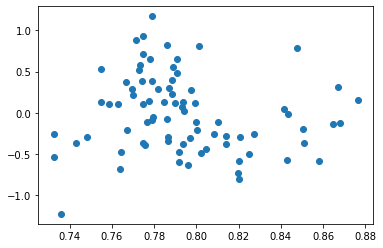

In [23]:
plt.scatter(np.log10(merge['mass_dust']), np.log10(merge['flux_Halpha6562'])) 

In [26]:
merge

<Table length=92>
HIIREGID    X       Y    ...           mass                  mass_dust        
 number  spaxels spaxels ...                                                  
  str7   float64 float64 ...         float64                  float64         
-------- ------- ------- ... ------------------------ ------------------------
  2PBC-1   165.0   200.0 ...  -5.986399147826752e+305  -5.986399147826752e+305
 2PBC-10   254.0    47.0 ...        6.823274168908565        7.039414418764975
 2PBC-11    62.0   157.0 ...        5.809062066366368        5.996530549364827
 2PBC-12   266.0   180.0 ...       5.7258459612422925        5.929995851532275
 2PBC-13   110.0   162.0 ...       5.9688295068991435        6.178425148901381
 2PBC-14   180.0   173.0 ...  -4.715856567390226e+306  -4.715856567390226e+306
 2PBC-15   190.0   213.0 ...       6.9846895085831955        7.090416371987963
 2PBC-16   125.0   242.0 ...        6.040495677596016        6.150510948256405
 2PBC-17   155.0   193.0 ...        7.375554075383721         7.52599818812063
     ...     ...     ... ...                      ...                      ...
 2PBC-84   151.0   169.0 ...        6.385449936412318        6.608221566760901
 2PBC-85   195.0   163.0 ...         5.97350589813911        6.189440046666216
 2PBC-86    79.0   217.0 ...        6.141660004799443        6.253258330437729
 2PBC-87   284.0   177.0 ...        5.202753795574625        5.401998432186052
 2PBC-88   252.0   160.0 ...        5.629081946898844        5.813607999650475
 2PBC-89    20.0   144.0 ...       5.6579200150795295        5.803947161409393
  2PBC-9   137.0   240.0 ...        6.228995420848574        6.327945546112554
 2PBC-90   127.0   219.0 ...        6.510469326891693         6.60923714090802
 2PBC-91     8.0   200.0 ...  -2.106481346586684e+307  -2.106481346586684e+307
 2PBC-92   312.0   228.0 ... -2.5838717673692406e+306 -2.5838717673692406e+306